<a href="https://colab.research.google.com/github/Janhavi-1/Techify_intern/blob/main/Traffic_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing**

In [2]:
!pip install geopy

In [3]:
!pip install plotly_express

# **Data Collection and Integration**

### **1.1 Data Collection**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/content/TrafficIndex_19Jun2022-26Jun2022.csv')

In [7]:
df.head()

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


### **1.2 Data Preprocessing**

In [8]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="test")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['City'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [9]:
df

,Rank,City,AverageTCI,MaxTCI,location,point
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)"
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)"
2,3,Mumbai,38.37,153.41,"(Mumbai Suburban, Maharashtra, India, (19.0785...","(19.0785451, 72.878176, 0.0)"
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)"
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.4893335, -0.14405508452768728, 0.0)"
...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)"
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)"
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)"
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)"


In [10]:
df['latitude']=df['point'].str[0]
df['longitude']=df['point'].str[1]

In [11]:
df

,Rank,City,AverageTCI,MaxTCI,location,point,latitude,longitude
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)",56.949398,24.105185
2,3,Mumbai,38.37,153.41,"(Mumbai Suburban, Maharashtra, India, (19.0785...","(19.0785451, 72.878176, 0.0)",19.078545,72.878176
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)",35.689252,51.389600
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.4893335, -0.14405508452768728, 0.0)",51.489334,-0.144055
...,...,...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)",1.357107,103.819499
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)",45.067755,7.682489
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)",39.469707,-0.376335


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        68 non-null     int64  
 1   City        68 non-null     object 
 2   AverageTCI  68 non-null     float64
 3   MaxTCI      68 non-null     float64
 4   location    68 non-null     object 
 5   point       68 non-null     object 
 6   latitude    68 non-null     float64
 7   longitude   68 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.4+ KB


<Axes: ylabel='City'>

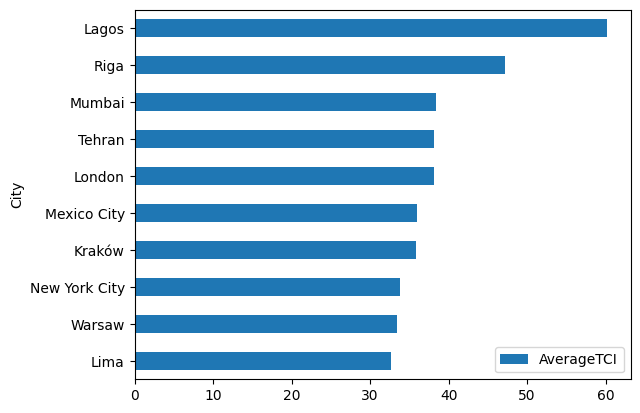

In [13]:
df.sort_values(by="AverageTCI",ascending=True).tail(10).plot.barh(x='City',y='AverageTCI')

In [14]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='City',hover_data=['AverageTCI'],color='AverageTCI',
    size="AverageTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=700,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Average TCI")
fig.show()

# Phase 3: Predictive Modeling
## 1. Data Splitting
### Split data into training, validation, and test sets.

In [15]:
print(df['MaxTCI'].dtype)
print(df['point'].dtype)


float64
object


In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'AverageTCI' is the target variable
X = df[['MaxTCI', 'point']]  # Features
y = df['AverageTCI']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(54, 2)
(14, 2)
(54,)
(14,)


In [18]:
import numpy as np

# Convert to numpy arrays if needed
X_train = np.array(X_train)
y_train = np.array(y_train)


In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = pd.DataFrame({'Point': ['A', 'B', 'A', 'C']})

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_points = one_hot_encoder.fit_transform(data[['Point']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_points, columns=one_hot_encoder.get_feature_names_out(['Point']))

print(encoded_df.head())


   Point_A  Point_B  Point_C
0      1.0      0.0      0.0
1      0.0      1.0      0.0
2      1.0      0.0      0.0
3      0.0      0.0      1.0


In [20]:
# Inspect the 'Point' column
print(df['point'].unique())
print(df['point'].dtype)

[(6.4550575, 3.3941795, 0.0) (56.9493977, 24.1051846, 0.0)
 (19.0785451, 72.878176, 0.0) (35.6892523, 51.3896004, 0.0)
 (51.4893335, -0.14405508452768728, 0.0) (19.4326296, -99.1331785, 0.0)
 (50.0469432, 19.997153435836697, 0.0) (40.7127281, -74.0060152, 0.0)
 (52.2337172, 21.071432235636493, 0.0) (-12.0621065, -77.0365256, 0.0)
 (4.6533816, -74.0836333, 0.0) (-6.175247, 106.8270488, 0.0)
 (-1.2043218, -47.1583944, 0.0) (30.0443879, 31.2357257, 0.0)
 (-41.5000831, 172.8344077, 0.0) (44.4361414, 26.1027202, 0.0)
 (41.0766019, 29.052495, 0.0) (53.3493795, -6.2605593, 0.0)
 (50.8465573, 4.351697, 0.0) (-22.9110137, -43.2093727, 0.0)
 (47.4978789, 19.0402383, 0.0) (-7.0964164, 112.5124298, 0.0)
 (55.7505412, 37.6174782, 0.0) (52.4796992, -1.9026911, 0.0)
 (59.3251172, 18.0710935, 0.0) (48.8534951, 2.3483915, 0.0)
 (53.7974185, -1.5437941, 0.0) (33.9597677, -83.376398, 0.0)
 (12.9767936, 77.590082, 0.0) (13.0836939, 80.270186, 0.0)
 (28.6138954, 77.2090057, 0.0) (52.5108638, 13.3989421, 0.

In [31]:
X_test_numeric = np.array([x for x in X_test if isinstance(x, (int, float))])

## 2. Model Selection
### Experiment with different models.

In [34]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming X_train contains mixed types, try to extract numerical features
# Replace 'feature_column_name' with the actual name of the column you want to use
X_train_numeric = np.array([x for x in X_train if isinstance(x, (int, float))])

# Reshape to 2D if necessary (assuming it's a single feature)
X_train_numeric = X_train_numeric.reshape(-1, 1)

y_train = np.array(y_train).ravel()

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_numeric, y_train)  # Use the numeric array here

# Inspect the data types in X_test
print(X_test.dtypes) # Check the data types of each column in X_test

# Preprocess X_test in the same way as X_train
# Extract numerical features and reshape if needed
# Adjust the filtering condition based on the data types in X_test
X_test_numeric = np.array([x for x in X_test.values.flatten() if isinstance(x, (int, float, np.float64))]) # Flatten the 2D array to 1D for filtering
X_test_numeric = X_test_numeric.reshape(-1, 1)

# Check if X_test_numeric is empty
if X_test_numeric.size == 0:
    print("Warning: X_test_numeric is empty. Check your data and filtering conditions.")
    # Add debugging information or adjust filtering conditions here

# Predictions
y_pred = model.predict(X_test_numeric) # Use preprocessed X_test

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MAE: {mae}, RMSE: {rmse}')

MaxTCI    float64
point      object
dtype: object
MAE: 7.663807142857147, RMSE: 11.774137608304308


In [35]:
# Example data compatibility check
print(X_train.dtype)
print(y_train.dtype)


object
float64


## 3. Model Training and Optimization
### Use techniques like cross-validation and hyperparameter tuning.

In [40]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_numeric, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': None, 'n_estimators': 50}
